In [1]:
 #DL_Lab_04
#  Recurrent neural network (RNN) Use the Google stock prices dataset and design a time
# seriesanalysis and prediction system using RNN

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Google_Stock_Price_Train (1).csv to Google_Stock_Price_Train (1).csv


In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Google_Stock_Price_Train.csv'

In [ ]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values
training_set.shape

(1509, 1)

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
#60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(1449, 60)

In [ ]:
y_train.shape

(1449,)

In [ ]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(1449, 60, 1)

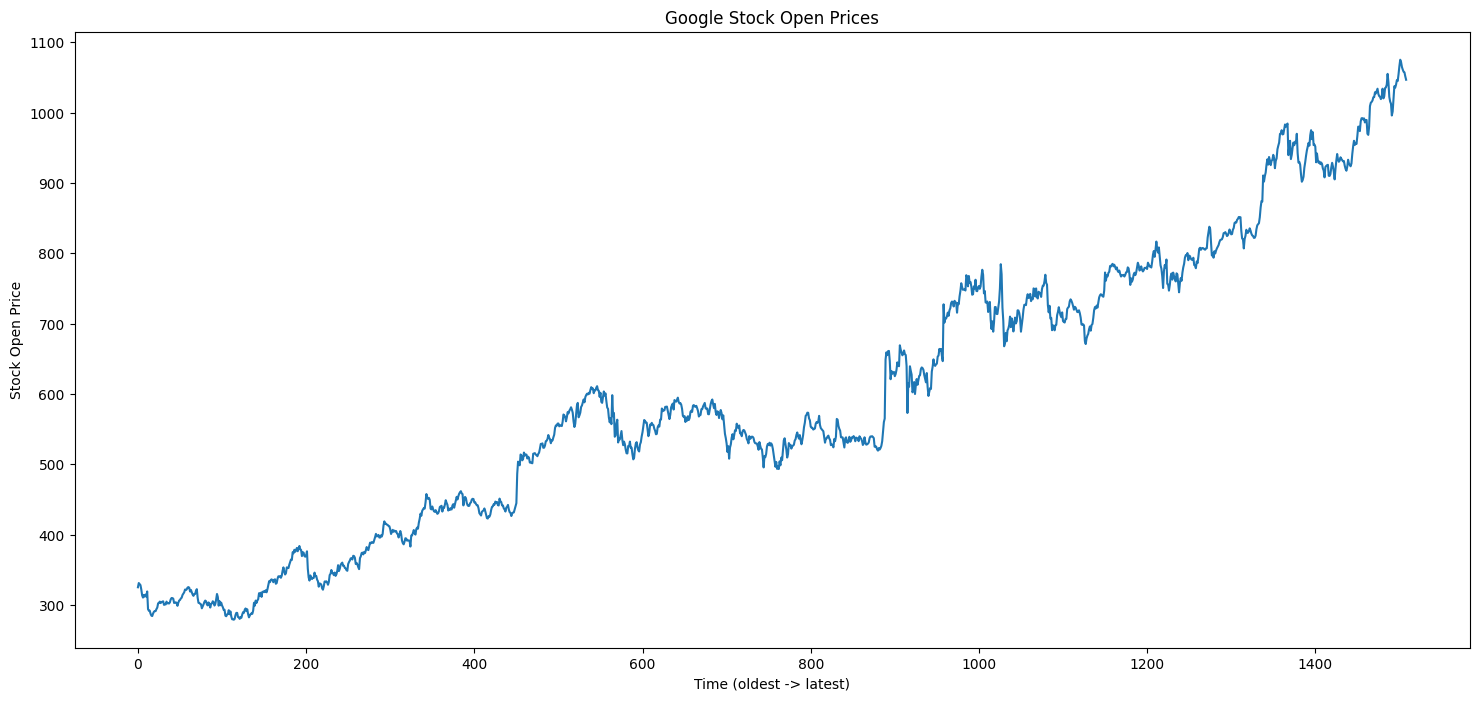

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

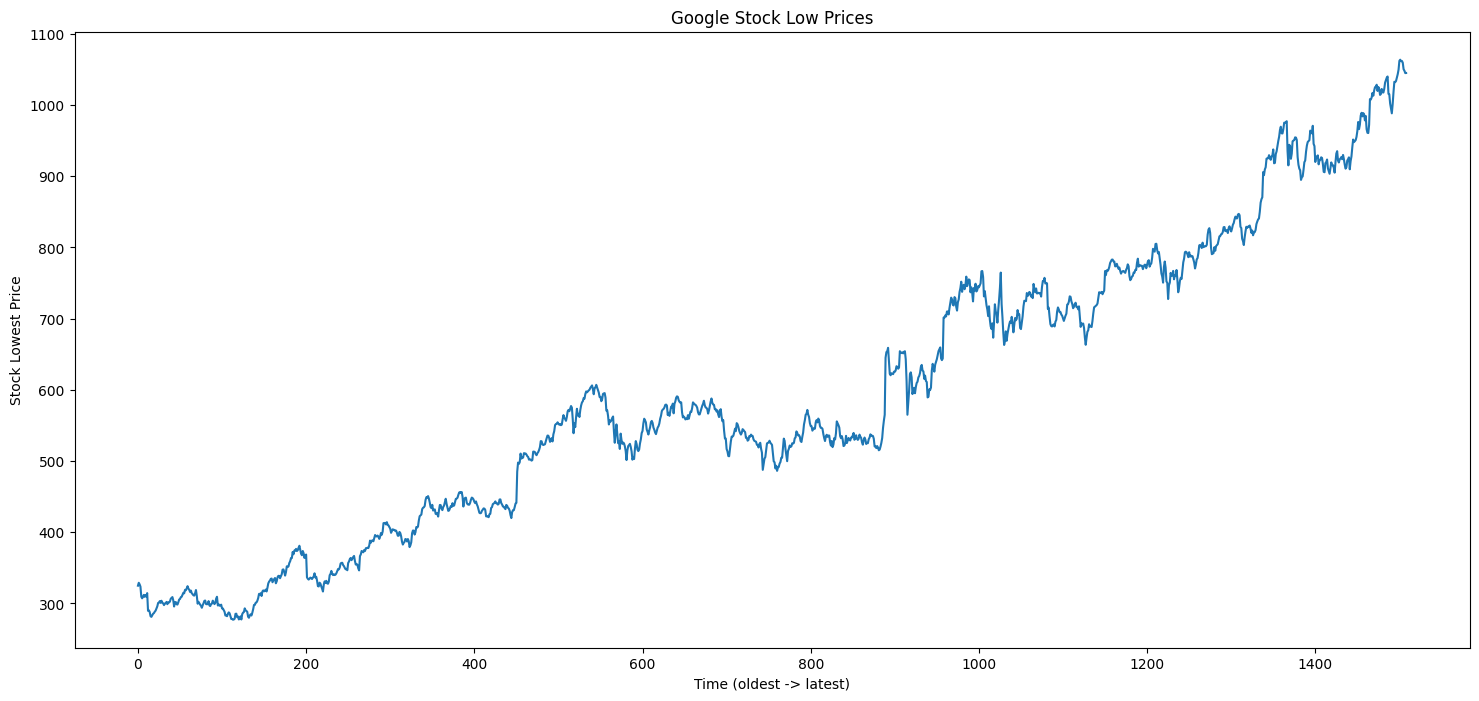

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()

In [ ]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 [==============================] - 12s 97ms/step - loss: 0.0300
Epoch 2/100
46/46 [==============================] - 5s 119ms/step - loss: 0.0043
Epoch 3/100
46/46 [==============================] - 4s 97ms/step - loss: 0.0034
Epoch 4/100
46/46 [==============================] - 4s 97ms/step - loss: 0.0036
Epoch 5/100
46/46 [==============================] - 5s 115ms/step - loss: 0.0031
Epoch 6/100
46/46 [==============================] - 5s 98ms/step - loss: 0.0035
Epoch 7/100
46/46 [==============================] - 5s 119ms/step - loss: 0.0031
Epoch 8/100
46/46 [==============================] - 4s 97ms/step - loss: 0.0027
Epoch 9/100
46/46 [==============================] - 5s 99ms/step - loss: 0.0032
Epoch 10/100
46/46 [==============================] - 5s 119ms/step - loss: 0.0027
Epoch 11/100
46/46 [==============================] - 4s 97ms/step - loss: 0.0026
Epoch 12/100
46/46 [==============================] - 5s 116ms/step - loss: 0.0025
Epoch 13/100
46/46 

In [ ]:
from google.colab import files
uploaded = files.upload()
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [ ]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

In [ ]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
                          axis = 0)
#use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)
len(inputs)

185

In [ ]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

(125, 60, 1)

In [ ]:
predicted_stock_price = regressor.predict(X_test)

4/4 [==============================] - 2s 30ms/step


In [ ]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

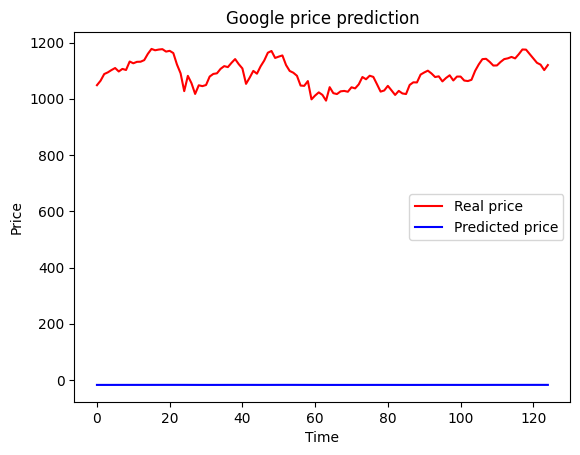

In [ ]:
#visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()